# On OOP with Python

## Some Useful Code Blocks for Reference

### Using Arbitrary (Keyword) Arguments
https://www.w3schools.com/python/python_functions.asp

Arbitrary Arguments, *args
\
If you do not know how many arguments that will be passed into your function, add a `*` before the parameter name in the function definition.

This way the function will receive a *tuple* of arguments, and can access the items accordingly:

In [127]:
# Example
# If the number of arguments is unknown, add a * before the parameter name:

def my_function(*kids):
  print("The youngest child is " + kids[-1])

my_function("Bill", "Linus Torvalds", "Elon")

The youngest child is Elon


Arbitrary Keyword Arguments, **kwargs
\
If you do not know how many keyword arguments that will be passed into your function, add two asterisk: ** before the parameter name in the function definition.

This way the function will receive a *dictionary* of arguments, and can access the items accordingly:

In [129]:
# Example
# If the number of keyword arguments is unknown, add a double ** before the parameter name:

def my_function(**kid):
  print("His last name is " + kid["lname"])

my_function(fname = "Linus", lname = "Torvalds")

His last name is Torvalds


### Using Dotenv for Api Keys

In [ ]:
# from dotenv import load_dotenv
# import os

# https://anaconda.org/conda-forge/python-dotenv
# !yes | conda install -c conda-forge python-dotenv
# load_dotenv()
# api_key = os.getenv("API_KEY")

### Using Pathlib for OS Agnostic File Paths
https://docs.python.org/3/library/pathlib.html

In [3]:
from pathlib import Path

p = Path('Python_Notes.pdf')

In [4]:
p.exists()

True

### Various Ways to Open a File

In [8]:
# import subprocess
# subprocess.Popen([p],shell=True)
# # OR
# import webbrowser
# webbrowser.open_new(p)
# # OR
# import os
# os.startfile(p)

### Open PDF or Image Within a Notebook

In [6]:
from IPython.display import IFrame
print(IFrame.__doc__)


    Generic class to embed an iframe in an IPython notebook
    


In [7]:
from pathlib import Path
p = Path('Python_Notes.pdf')

# IFrame(p, width=900, height=900)
IFrame(p, width=1000, height=1500)

In [8]:
q = Path('visuals/Anaconda_Image.jpg')
IFrame(q, width=300, height=190)

### Manually Iterating Through an Iterable Object

In [48]:
i = [3,4,5,2,2]

print(i.__iter__())

In [49]:
x = iter(i)

In [50]:
print(next(x))
print(i[0])

3
3


In [51]:
print(next(x))
print(i[1])

4
4


### Saving PDf Of Matplotlib Plot

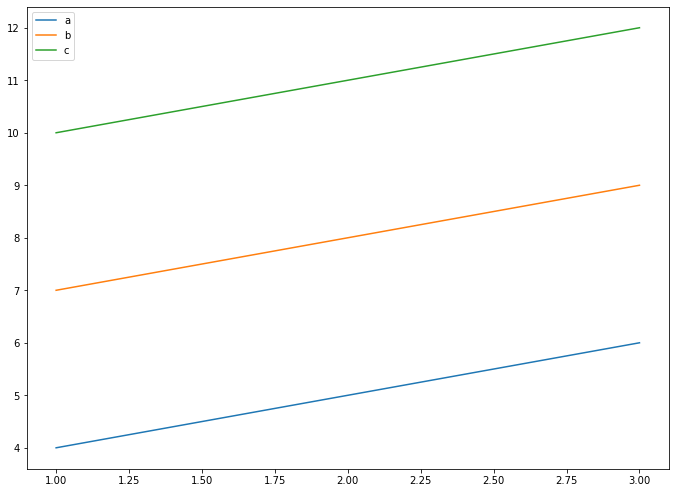

In [41]:
# https://matplotlib.org/stable/api/backend_pdf_api.html
import matplotlib.backends.backend_pdf
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Some example DF
df = pd.DataFrame(
{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])

# Set the path and file name
filename = Path(r'visuals\image.pdf')
pdf = matplotlib.backends.backend_pdf.PdfPages(filename)

df.plot()
fig = plt.gcf()
plt.gcf().set_size_inches(11.5, 8.5)
# Save Output to a PDF
pdf.savefig(fig)

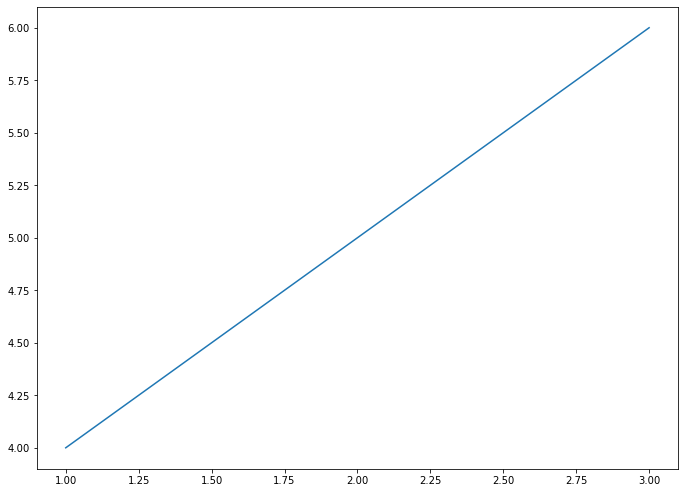

In [42]:
# Multiple plots can be saved to the PDF before closing it.
df.a.plot()
fig = plt.gcf()
plt.gcf().set_size_inches(11.5, 8.5)
pdf.savefig(fig)
pdf.close()

In [40]:
from pathlib import Path
r = Path(filename)
from IPython.display import IFrame
IFrame(r, width=800, height=1240)

### Pulling Data From Yahoo Finiance without an API Key
### and Setting up for ML/DL 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
import yfinance as yf

# %matplotlib inline

# SELF DOCUMENTING
ticker_list = ['SQ',
'GS',
'GDOT',
'MELI',
'BAC',
'PYPL',
'NVDA',
'CME',
'DOCU']

# ticker_list

#CREATES A DATAFRAME OF THE CLOSE PRICE OF THE ticker_list STARTING FROM 2018
x = 0
while x in range(len(ticker_list)):
    if x == 0:
        df = yf.Ticker(ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])    
    else:
        df1 = yf.Ticker(ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])
        df = pd.concat([df, df1], axis=1)
    x += 1

df.tail()

,SQ,GS,GDOT,MELI,BAC,PYPL,NVDA,CME,DOCU
Date,,,,,,,,,
2021-11-03,252.479996,417.899994,43.680000,1531.930054,48.369999,230.380005,265.980011,220.440002,283.209991
2021-11-04,247.460007,408.070007,44.549999,1556.489990,47.330002,228.220001,298.010010,220.570007,284.109985
2021-11-05,237.380005,407.079987,44.040001,1629.760010,46.970001,225.779999,297.519989,221.710007,267.489990
2021-11-08,236.770004,408.339996,43.439999,1650.000000,47.340000,229.419998,308.040009,220.669998,273.910004
2021-11-09,230.860001,401.070007,43.990002,1700.920044,46.455002,202.786697,301.100006,221.100006,274.640015


<AxesSubplot:xlabel='Date'>

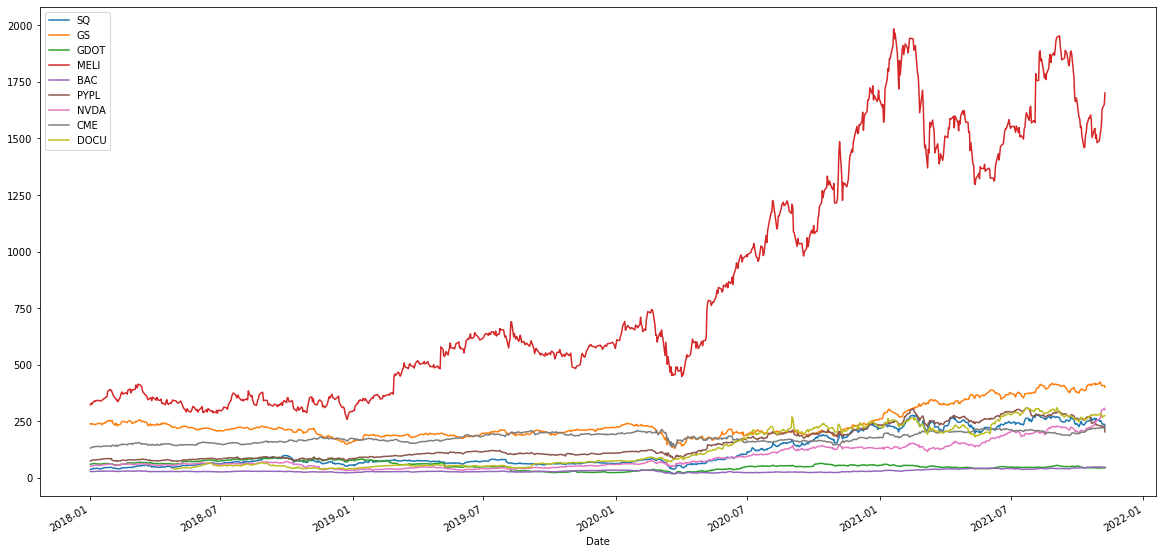

In [66]:
df.plot(figsize=(20,10))

In [67]:
# Looking for missing values
df.isnull().sum()

SQ       0
GS       0
GDOT     0
MELI     0
BAC      0
PYPL     0
NVDA     0
CME      0
DOCU    80
dtype: int64

<AxesSubplot:xlabel='Date'>

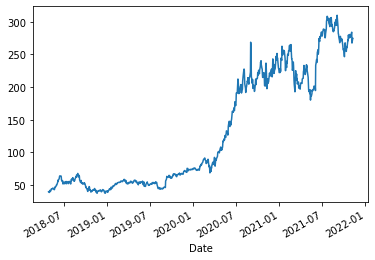

In [68]:
df.iloc[:,-1].plot()

In [69]:
# Filling missing values with the first non null
df = df.fillna(method ='bfill')

df.isnull().sum()

SQ      0
GS      0
GDOT    0
MELI    0
BAC     0
PYPL    0
NVDA    0
CME     0
DOCU    0
dtype: int64

<AxesSubplot:xlabel='Date'>

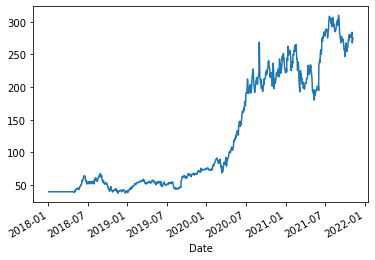

In [70]:
df.iloc[:,-1].plot()

In [71]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)

# !pip install --upgrade tensorflow
# try this one if you get a pyparsing error
# !conda update -c anaconda pyparsing
from tensorflow import random

random.set_seed(2)

#### We can also try autoML & other libraries that may be easier and more accurate.
https://www.automl.org/automl/ #lists several top-notch autoML libs.
\
https://www.activestate.com/blog/the-top-10-automl-python-packages-to-automate-your-machine-learning-tasks/ #additional tools
\
https://facebook.github.io/prophet/docs/quick_start.html #forecast procedure, extremely east to use.
\
https://github.com/ProsusAI/finBERT #pre-trained NLP model to analyze sentiment of financial text.

### Converting a Notebook to a Python Script & Running it From the CLI
### *Be sure surrond all standalone variables with `print()`* 

In [9]:
# You can convert a notebook to a script from the terminal with this:
# !jupyter nbconvert --to script my_notebook.ipynb

# Alternatively you can just click on:
    # File -> Save and Export Notebook As... -> Executable Script 
    
t = Path('visuals/Converting_to_python_script_example.png')
IFrame(t, width=800, height=920)

#### To execute a script from your cli you'll need to follow one of these formats
#### after navigating to the dir of the python script.

In [ ]:
# py my_python_files_name_replaced_here.py

In [ ]:
# python my_python_files_name_replaced_here.py

In [ ]:
# python3 my_python_files_name_replaced_here.py

You can even execute them within scripts or notepooks by using the ! before the line.

### Using `conda`

In [2]:
from IPython.display import IFrame
from pathlib import Path
p = Path('conda-cheatsheet.pdf')
IFrame(p, width=1000, height=1500)

#### Best Practices Include
#### - Creating a New Conda ENV for Each New Project
#### - Creating an Installation Guide to Reproduce the Conda ENV on All Major Platforms (Mac, Win, Linux)

Say you have a good environment that you would like to use for many different projects named `pyvizenv`
\
You would want to do this create the new conda ENV:

In [ ]:
# conda create --clone pyvizenv --name replace_this_with_the_new_name_to_be_named

From here you would want to `conda` or `pip` in any new packages,
\
it's advised to keep track of them to make installation guides easier to produce.

## Python OOP: Classes

In [1]:
# *Note: Methods like .__init__() and .__str__() are called dunder methods because they begin and end with
# double underscores.

In [27]:
# https://realpython.com/python3-object-oriented-programming/
# see also https://en.wikibooks.org/wiki/Python_Programming/Classes
# Python class names are written in CapitalizedWords notation by convention. 
# For example, a class for a specific breed of dog like the Jack Russell Terrier would be written as JackRussellTerrier.

class StudentClass:
    """This is a Doc string.
    It's basically creating your own Documentation.
    For when you press tab or shift + tab"""
    
    
    # Every time a new Student object is created, .__init__() sets the initial state of the object by assigning the values of 
    # the object’s properties. That is, .__init__() initializes each new instance of the class.
    def __init__(self, student_fname, student_lname, student_age, student_absences):
        # You can give .__init__() any number of parameters, but the first parameter will always be a variable called self.
        self.student_fname = student_fname
        self.student_lname = student_lname
        self.student_age = student_age
        self.student_absences = student_absences
        # Attributes created in .__init__() are called instance attributes. An instance attribute’s value is specific to a 
        # particular instance of the class. All Student objects have a fname, lname, age and an absences, 
        # but the values for each of these attributes will vary depending on the Student instance.

In [11]:
# Check your Doc String

# StudentClass # Press shift + tab at the end of StudentClass to see the Doc string we created above
from pathlib import Path
r = Path('visuals/doc_string_example.png')
from IPython.display import IFrame
IFrame(r, width=800, height=190)

In [29]:
# Instantiate a class object

StudentClass()
# Look at the error being generated, we need to pass it arguments.

TypeError: __init__() missing 4 required positional arguments: 'student_fname', 'student_lname', 'student_age', and 'student_absences'

In [30]:
student_mark = StudentClass('Mark', 'Charipar', '33', .68)
print(student_mark, type(student_mark)) # Look at the object type.

<__main__.StudentClass object at 0x000001FCE533ABB0> <class '__main__.StudentClass'>


In [31]:
marks_first_name = student_mark.student_fname
print(marks_first_name, type(marks_first_name))

Mark <class 'str'>


In [32]:
# Python objects are mutable by default
student_mark.student_fname = 'Bill'
marks_first_name = student_mark.student_fname
print(marks_first_name)

Bill


In [33]:
# Instance Methods

class StudentClass:
    """A class that creates a student object.
    student_fname is the students first name.
    student_lname is the students last name.
    student_age is the students age.
    student_absences is the cummulative number of the students absences."""
    
    def __init__(self, student_fname, student_lname, student_age, student_absences):
        # You can give .__init__() any number of parameters, but the first parameter will always be a variable called self.
        # In Python, you both declare and define attributes inside the class __init__()
        self.student_fname = student_fname
        self.student_lname = student_lname
        self.student_age = student_age
        self.student_absences = student_absences
        
    def student_info(self):
        """Method that returns info on the student object."""
        return '{} {} is {} years old and has a total of {} absences.'.format(self.student_fname, self.student_lname, 
                                                                            self.student_age, self.student_absences)
    def status(self, student_status):
        """Function that returns a student objects status."""
        return '{} {}\'s status is {}.'.format(self.student_fname, self.student_lname, student_status)
    
    # This method will change the default print() output when instantiating the class object
    def __str__(self):
        return 'This is a __str__ method being called.'
    
    def term(self, student_term):
        return '{} {} is enrolled in the {} term.'.format(self.student_fname, self.student_lname, student_term)

In [34]:
StudentClass('Mark', 'Charipar', '33', .68)

In [35]:
print(StudentClass('Mark', 'Charipar', '33', .68)) # Here we are calling .__str__ by default, 
#                                                    if there is no .__str__ it returns the above output

This is a __str__ method being called.


In [36]:
student_mark = StudentClass('Mark', 'Charipar', '33', .68)
print(student_mark.student_info())

Mark Charipar is 33 years old and has a total of 0.68 absences.


In [37]:
# Here We are calling the __str__ method instead.
print(student_mark)

This is a __str__ method being called.


In [38]:
print(student_mark.status('active'))

Mark Charipar's status is active.


In [39]:
print(student_mark.term('Aug. 2021'))

Mark Charipar is enrolled in the Aug. 2021 term.


In [40]:
print('Is student_mark an object of the StudentClass class?\n\t' + str(isinstance(student_mark, StudentClass)) 
      + ': ' +str(type(student_mark)))

Is student_mark an object of the StudentClass class?
	True: <class '__main__.StudentClass'>


### Parent Classes vs Child Classes

In [41]:
class SecondSemester(StudentClass): # Notice we are passing the StudentClass class as a parameter.
    """A Child Class of the StudentClass.
    It inherits the attributes of the Parent Class, StudentClass."""
    
    def next_term(self, student_term = 'Jan. 2022'):
        """A default constructor method that returns the start of the next semester."""
        return '{} {} is enrolled in the {} term.'.format(self.student_fname, self.student_lname, student_term)

In [42]:
future_fintech_student = SecondSemester('Bill', 'Johnson', '72', 0).next_term() # We call the next_term method of the child class here.
print(future_fintech_student)

Bill Johnson is enrolled in the Jan. 2022 term.


In [43]:
future_fintech_student = SecondSemester('Bill', 'Johnson', '72', 0) 
print(type(future_fintech_student))
print(isinstance(future_fintech_student, SecondSemester))

<class '__main__.SecondSemester'>
True


In [44]:
print(type(student_mark))
print(isinstance(student_mark, SecondSemester))

<class '__main__.StudentClass'>
False


In [58]:
print(type(student_mark))
print('Is the SecondSemester class a Child Class?:\n\t' + str(issubclass(SecondSemester, StudentClass)))

<class '__main__.StudentClass'>
Is the SecondSemester class a Child Class?:
	True


## Python OOP: Simple Imports

In [10]:
from pathlib import Path
r = Path('visuals/simple_import.png')
from IPython.display import IFrame
IFrame(r, width=800, height=200)

In [5]:
import example

In [6]:
print('Note we don\'t have to use () becasue we are calling an attribute:\n\n' + example.simple_example)

Note we don't have to use () becasue we are calling an attribute:

If our instructor says it, it likely is correct.


When we use `import` weare looking for scripts in the current directory or where we have the rest of our packages.
\
The below output shows where its looking. It's going to vary on different systems and has to do with the `PYTHONPATH `.

In [8]:
import sys
sys.path

['E:\\Trilogy\\BackEnd\\Python_OOP',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\mchar\\.ipython']

We can even append to this `PYTHONPATH` list so we can make it look in another location.

In [25]:
ex_path = Path(str(Path.cwd()) + '/' + 'example_folder')
str(ex_path)

'E:\\Trilogy\\BackEnd\\Python_OOP\\example_folder'

In [31]:
sys.path.append(str(ex_path))

In [32]:
sys.path

['E:\\Trilogy\\BackEnd\\Python_OOP',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\mchar\\.ipython',
 'E:\\Trilogy\\BackEnd\\Python_OOP\\example_folder']

In [39]:
import example2
print(example2.simple_example + '\n\nHere is where example is located: ' + str(example2.__file__))

This is the updated example2.py in another folder.

Here is where example is located: E:\Trilogy\BackEnd\Python_OOP\example_folder\example2.py


We can also do this by treating it like a package.

In [4]:
import example_folder.example2 as ex2

In [6]:
print(ex2.simple_example + ' Except now we trated it as a package.')

This is the updated example2.py in another folder. Except now we trated it as a package.


## Python OOP: Importing Classes

In [1]:
# Here we are calling studentclass.py
import studentclass

In [2]:
# And here we are calling the StudentClass() class within studentclass.py using 'dot operator' '.'
# studentclass.StudentClass()

In [12]:
# StudentClass # Press shift + tab at the end of StudentClass to see the Doc string we created above
from pathlib import Path
r = Path('visuals/doc_string_ex_2.png')
from IPython.display import IFrame
IFrame(r, width=1200, height=460)

In [4]:
# Now lets pass 4 parameters.
studentclass.StudentClass('John', 'Doe', '28', '0')

In [5]:
# But we still need to make that instance of the class a variable
student_john = studentclass.StudentClass('John', 'Doe', '28', '0')
print(student_john , '\nNotice that the __str__ method is called here.')

This returns the __str__ method. 
Notice that the __str__ method is called here.


In [6]:
# We can also call in the .__dict__ dunder method to see the instance of the classes attributes.
student_john.__dict__

{'student_fname': 'John',
 'student_lname': 'Doe',
 'student_age': '28',
 'student_absences': '0'}

In [17]:
# Calling vars() will do the same thing
print(vars(student_john))

{'student_fname': 'John',
 'student_lname': 'Doe',
 'student_age': '28',
 'student_absences': '0'}

In [13]:
r = Path('visuals/tab_with_dot_operator.png')
from IPython.display import IFrame
IFrame(r, width=800, height=300)

In [8]:
# student_john.

In [9]:
# Don't forget to use '()' at the end of methods even if they don't have arguements.
print(type(student_john.student_info), type(student_john.student_info()))
print(student_john.student_info)
print(student_john.student_info())

<class 'method'> <class 'str'>
<bound method StudentClass.student_info of <studentclass.StudentClass object at 0x000001FCE29E89D0>>
John Doe is 28 years old and has a total of 0 absences.


In [10]:
# Now we create an instance of the child class SecondSemester
studentclass.SecondSemester('John', 'Smith', '41', 0)

In [11]:
print(studentclass.SecondSemester('John', 'Smith', '41', 0))

This returns the __str__ method.


In [12]:
studentclass.SecondSemester('John', 'Smith', '41', 0).next_term

<bound method SecondSemester.next_term of <studentclass.SecondSemester object at 0x000001FCE2A8EB20>>

In [13]:
studentclass.SecondSemester('John', 'Smith', '41', 0).next_term()

'John Smith is enrolled in the Jan. 2022 term.'

In [14]:
student_john_term_two = studentclass.SecondSemester('John', 'Smith', '41', 0).next_term()

Note we don't have to use () becasue we are calling an attribute:

If our instructor says it, it likely is correct.


## Python OOP: Digging Deeper

In [36]:
# Here we are using an alias with our imported module.
import studentclass as sc

In [67]:
# We can call dir() to look at what classes the studentclass.py contains
dir(sc)

['SecondSemester',
 'StudentClass',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

__builtins__
\
This has to do with the builtin namespace and you likely will never need ot dig in here

In [96]:
# dir(sc.__builtins__)

In [94]:
# dir(__builtins__)

In [ ]:
# globals()

__cached__

In [76]:
# This shows us the cached .pyc file.
sc.__cached__

'E:\\Trilogy\\BackEnd\\Python_OOP\\__pycache__\\studentclass.cpython-38.pyc'

In [14]:
from pathlib import Path
r = Path('visuals/pycache_example.png')
from IPython.display import IFrame
IFrame(r, width=1200, height=460)

In [15]:
w = Path('visuals/pyc_example.png')
IFrame(w, width=1200, height=190)

https://www.tutorialspoint.com/What-are-pyc-files-in-Python

".pyc files are created by the Python interpreter when a .py file is imported. 
They contain the "compiled bytecode" of the imported module/program so that the
"translation" from source code to bytecode (which only needs to be done once) 
can be skipped on subsequent imports if the .pyc is newer than the 
corresponding .py file, thus speeding startup a little. But it's still interpreted. 
Once the *.pyc file is generated, there is no need of *.py file, unless you edit it."
- Rajendra Dharmkar

__doc__

In [104]:
print('The __doc__ dunder method will give you access to a class or methods docstring:\n\n' 
      + sc.StudentClass.__doc__)

The __doc__ dunder method will give you access to a class or methods docstring:

A class that creates a student object.
    student_fname is the students first name.
    student_lname is the students last name.
    student_age is the students age.
    student_absences is the cummulative number of the students absences.


In [106]:
print('We see it used again with a method now:\n\n' 
      + sc.StudentClass.student_info.__doc__)

We see it used again with a method now:

Method that returns info on the student object.


We can use these docstrings to help us make some documentation easily using:
\
https://www.sphinx-doc.org/en/master/

__file__

In [110]:
print('Here we get to see where the module is located:\n\n' + str(sc.__file__))

Here we get to see where the module is located:

E:\Trilogy\BackEnd\Python_OOP\studentclass.py


__loader__

In [114]:
print(sc.__loader__)

In [115]:
# We only need to use __loader__ ever to see if a module used a custom loader, like this.
print(hasattr(sc, '__loader__'))

True


__name__

In [119]:
print(sc.__name__)

studentclass


This is used primarily in code that looks like this:

In [ ]:
# if __name__ == "__main__":

We can use this when creating a package otherwise,
it's useful in this case mostly:

"Sometimes you write a script with functions that might be useful in other scripts as well. In Python, you can import that script as a module in another script.

Thanks to this special variable, you can decide whether you want to run the script. Or that you want to import the functions defined in the script."
- Bert Carremans
\
Data Scientist

Read more about it if needed:
\
https://www.freecodecamp.org/news/whats-in-a-python-s-name-506262fe61e8/
\
https://www.geeksforgeeks.org/__name__-special-variable-python/
\
https://docs.python.org/3/library/__main__.html

__package__

A package is basically a folder that contains multiple modules, it makes things easier for us.

In [7]:
import example_folder.example2 as ex2
# OR
from example_folder import example2

In [9]:
print(ex2.__package__, example2.__package__)

example_folder example_folder


We can also use a `__init__.py` file to create a global variables or to atutomatically import modules from the package.

In [16]:
from pathlib import Path
r = Path('visuals/init_example.png')
from IPython.display import IFrame
IFrame(r, width=680, height=180)

In [1]:
from example_folder import this_is_an_example__init__variable

In [2]:
print(this_is_an_example__init__variable)

Pretty cool beans right?


In [3]:
import example_folder

In [6]:
print(example_folder.example__init__import)

<module 'example_folder.example2' from 'E:\\Trilogy\\BackEnd\\Python_OOP\\example_folder\\example2.py'>


In [5]:
print(example_folder.example__init__import.simple_example + ' Except this time we used __init__ and as a package.')

This is the updated example2.py in another folder. Except this time we used __init__ and as a package.


__spec__

From the [Python Language Reference, Part 5: The Import System](https://docs.python.org/3/reference/import.html#__spec__) (emphasis mine):

The __spec__ attribute must be set to the module spec that was used when importing the module. This is used primarily for introspection and during reloading. Setting __spec__ appropriately applies equally to modules initialized during interpreter startup. The one exception is __main__, where __spec__ is set to None in some cases.

New in version 3.4.

In [37]:
sc.__spec__

ModuleSpec(name='studentclass', loader=<_frozen_importlib_external.SourceFileLoader object at 0x000001C7DB640640>, origin='E:\\Trilogy\\BackEnd\\Python_OOP\\studentclass.py')

Additional info:
\
https://realpython.com/python-modules-packages/
\
https://tenthousandmeters.com/blog/python-behind-the-scenes-11-how-the-python-import-system-works/